# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.21.3


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1212063
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [67 60 41 57 60 61 67 62 67 58]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


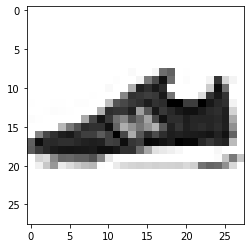

LABEL: 7
INPUT:


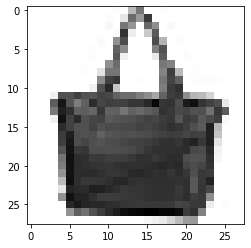

LABEL: 8
INPUT:


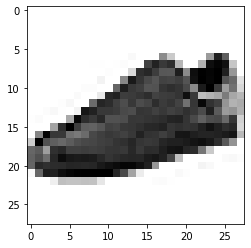

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (40,20,), (40,30,20), (100,), (50,50), (50,50,50),(10,10,10) ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

mlp_cv = GridSearchCV(mlp, parameters, cv=5, return_train_score=True)
mlp_cv.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:",mlp_cv.best_params_)

print("Score with best parameters:",mlp_cv.best_score_)

print("\nAll scores on the grid:")
import pandas as pd
mlp_scores=pd.DataFrame(mlp_cv.cv_results_)           
mlp_scores


/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.8033333333333333

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.984903,0.462341,0.001709,0.000103,"(10,)","{'hidden_layer_sizes': (10,)}",0.776,0.780488,0.779661,0.769231,...,0.770000,0.013584,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.127489,0.249530,0.002083,0.000240,"(20,)","{'hidden_layer_sizes': (20,)}",0.784,0.788618,0.796610,0.803419,...,0.786667,0.014425,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,2.375594,0.282868,0.002249,0.000087,"(40,)","{'hidden_layer_sizes': (40,)}",0.824,0.813008,0.805085,0.811966,...,0.803333,0.021863,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,1.442230,0.520607,0.002502,0.000243,"(40, 20)","{'hidden_layer_sizes': (40, 20)}",0.776,0.788618,0.822034,0.692308,...,0.761667,0.045691,6,0.924211,1.000000,1.000000,0.774327,0.968944,0.933496,0.084289
4,1.487526,0.423179,0.002538,0.000311,"(40, 30, 20)","{'hidden_layer_sizes': (40, 30, 20)}",0.720,0.626016,0.110169,0.427350,...,0.511667,0.221346,8,0.875789,0.744235,0.112033,0.461698,0.668737,0.572498,0.266475
5,3.991324,0.371162,0.003296,0.000041,"(100,)","{'hidden_layer_sizes': (100,)}",0.816,0.804878,0.788136,0.777778,...,0.791667,0.017244,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,1.532932,0.397451,0.002549,0.000072,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.832,0.796748,0.686441,0.786325,...,0.773333,0.048769,4,1.000000,1.000000,0.800830,1.000000,0.995859,0.959338,0.079270
7,1.314194,0.210820,0.002684,0.000050,"(50, 50, 50)","{'hidden_layer_sizes': (50, 50, 50)}",0.776,0.447154,0.728814,0.683761,...,0.683333,0.125297,7,0.943158,0.452830,0.800830,0.763975,0.973085,0.786776,0.185150
8,0.584310,0.300589,0.001822,0.000044,"(10, 10, 10)","{'hidden_layer_sizes': (10, 10, 10)}",0.408,0.479675,0.355932,0.470085,...,0.423333,0.045941,9,0.444211,0.534591,0.396266,0.463768,0.414079,0.450583,0.048072


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [32,300,480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
batch_mlp = MLPClassifier(hidden_layer_sizes=(40,),max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

In [10]:
# recall to use cv=kf in GridSearchCV parameters to use the k-fold subdivision seen in the lectures

batch_mlp_cv = GridSearchCV(batch_mlp, parameters, cv=kf, return_train_score=True)
batch_mlp_cv.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:",batch_mlp_cv.best_params_)

print("Score with best parameters:",batch_mlp_cv.best_score_)

print("\nAll scores on the grid:")
batch_mlp_scores=pd.DataFrame(batch_mlp_cv.cv_results_)           
batch_mlp_scores

RESULTS FOR NN

Best parameters set found: {'batch_size': 480}
Score with best parameters: 0.8066666666666666

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.946070,0.328279,0.002259,0.000231,32,{'batch_size': 32},0.750000,0.775000,0.808333,0.750,...,0.761667,0.028186,3,0.916667,0.989583,0.9375,0.98125,0.99375,0.96375,0.030918
1,2.420963,0.226938,0.002170,0.000062,300,{'batch_size': 300},0.825000,0.791667,0.816667,0.825,...,0.798333,0.034721,2,1.000000,1.000000,1.0000,1.00000,1.00000,1.00000,0.000000
2,2.396904,0.643621,0.002182,0.000062,480,{'batch_size': 480},0.841667,0.783333,0.825000,0.825,...,0.806667,0.030912,1,1.000000,1.000000,1.0000,1.00000,0.98125,0.99625,0.007500


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

The best architecture that was found is the one made of only one layer of size 40, and other architectures with only one layer lead (e.g. size 20, size 100) lead to a similar score of the best (~0.8). Increasing the number of layers to two or taking one layer with few neurons (10) lead to worse performances, and even worse performances are obtained increasing again the number of layers to 3. 
Instead, for what concern the batch size, the best score was found with the maximum size, 480. This is reasonable, since this size corresponds to the standard GD, that is more expenisve but more precise than the SGD. In addition, it can be noticed that the algorithm could not converge for low values of the batch size, therefore in this case the baseline SGD can not be performed.

### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
lr_list = [10**exp for exp in range(-3,0)]
scores = {}
test_acc = {}

In [12]:
#fixed one layer with 40 neurons, fixed batch size to 480

for ii in lr_list:
    lr_mlp = MLPClassifier(hidden_layer_sizes=(40,),max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init= ii,batch_size=480)
    lr_mlp.fit(X_train, y_train)
    y_predicted = lr_mlp.predict(X_test)
    test_acc[str(ii)] = accuracy_score(y_test, y_predicted)
    loss_values = lr_mlp.loss_curve_
    scores[str(ii)] = loss_values

/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


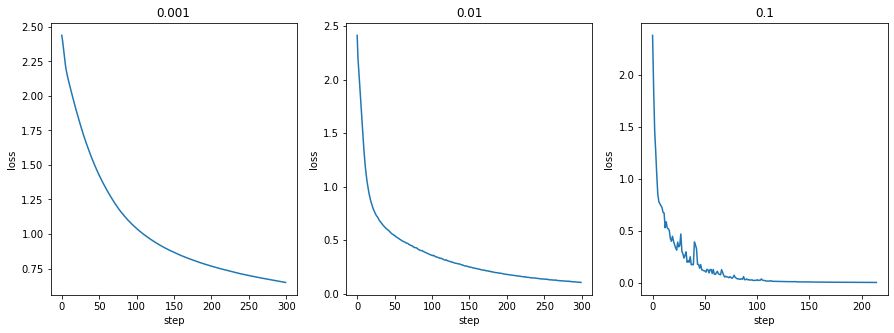

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.plot(scores['0.001'])
ax1.set_xlabel('step')
ax1.set_ylabel('loss')
ax1.set_title('0.001')

ax2.plot(scores['0.01'])
ax2.set_xlabel('step')
ax2.set_ylabel('loss')
ax2.set_title('0.01')

ax3.plot(scores['0.1'])
ax3.set_xlabel('step')
ax3.set_ylabel('loss')
ax3.set_title('0.1')

plt.show()

In [14]:
test_acc

{'0.001': 0.7298484848484849,
 '0.01': 0.7967003367003367,
 '0.1': 0.7988720538720538}

In [15]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print('learning rate= 0.1')

print("Score with best parameters:", test_acc['0.1'])

RESULTS FOR NN

Best parameters set found:
learning rate= 0.1
Score with best parameters: 0.7988720538720538


### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

The learning rate has an important impact on stability and convergence. The first value, 0.001, didn't allow the algorithm to converge within 300 steps; with 0.01 also the algorithm missed the 0 for few, while it converged quickly for the value 0.1. With this last value the stability isn't perfect (the graphic shows some fluctuations), while for the other values the curves seems smoother; concerning the score, the 0.1 and the 0.01 values lead to similar results.

### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.

In [16]:
best_mlp = MLPClassifier(hidden_layer_sizes=(40,),max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init= 0.1,batch_size=480)

best_mlp.fit(X_train, y_train)
y_train_predicted = best_mlp.predict(X_train)
y_test_predicted = best_mlp.predict(X_test)

training_error = 1.0 - accuracy_score(y_train,y_train_predicted)
test_error = 1.0 - accuracy_score(y_test,y_test_predicted)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.201128


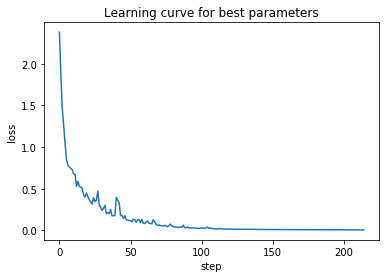

In [17]:
best_loss_values = best_mlp.loss_curve_
plt.plot(best_loss_values)
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Learning curve for best parameters')
plt.show()

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [18]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [506 532 479 476 482 513 506 477 509 520]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [19]:
best_mlp_large = MLPClassifier(hidden_layer_sizes=(40,),max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init= 0.1,batch_size=480, verbose=False)

best_mlp_large.fit(X_train,y_train)     #the predictor is the same, but trained with more points
y_train_predicted_large = best_mlp_large.predict(X_train)
y_test_predicted_large = best_mlp_large.predict(X_test)

training_error = 1.0 - accuracy_score(y_train,y_train_predicted_large)
test_error = 1.0 - accuracy_score(y_test,y_test_predicted_large)



print ('\nRESULTS FOR NN\n')

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)



RESULTS FOR NN

NN training error: 0.000000
NN test error: 0.163800


## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

As expected, the test error in the second case is smaller than the test error found in the first case. With the same architecture, the training made with more data lead to a better learning and prediction.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

INPUT:


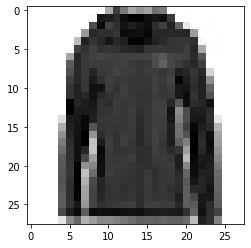

LABEL: 4
m_training=600 label:  2
m_training=5000 label:  4


In [23]:
NN_prediction = best_mlp.predict(X_test)
large_NN_prediction = y_test_predicted_large

for ii in range(len(NN_prediction)):
    if NN_prediction[ii] != y_test[ii] and large_NN_prediction[ii] == y_test[ii]:
        plot_input(X_test,y_test,ii)
        print('m_training=600 label: ',NN_prediction[ii])
        print('m_training=5000 label: ',large_NN_prediction[ii])
        break

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


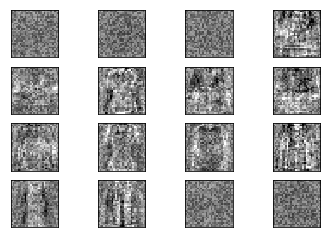

Weights with 5000 data points:


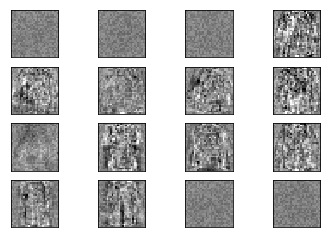

In [21]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

The images representing the weights of the case with more points are more blurry than the ones of the case with 600 points.

### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [24]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

SVM = SVC(kernel='rbf',C=5,gamma=0.005)
SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1. - SVM.score(X_train,y_train)
print("Training error SVM:",SVM_training_error)

SVM_test_error = 1. - SVM.score(X_test,y_test)
print("Test error SVM:",SVM_test_error)

print('\n Training score: ',SVM.score(X_train,y_train))
print('Test score: ',SVM.score(X_test,y_test))


RESULTS FOR SVM
Training error SVM: 0.06320000000000003
Test error SVM: 0.14300000000000002

 Training score:  0.9368
Test score:  0.857


## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

Relying on the test error, the SVM lead to a smaller test error (\~0.143) than the NN (\~0.1638), and therefore should be preferable. In addiction, we can notice that the SVM has a bigger training error, and this fact leads to think that for this exercise the SVM is less prone than the NN of overfitting the data.